# **Animal Detection And Classification**

Project Code
```
Group 29
Chirayu Chaplot (201801038)
Dhanvi Shah (201801167)
Rutwa Rami (201801205)
Shabbir Murtaza (201801428)
Dishita Thaker (201801442)
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#Accessing the classes of various animals from animals10 dataset
Name0=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/animals10/raw-img'):
    Name0+=[dirname]

Name1=[]
for item in Name0:
    Name1+=[item[41:]]

Name2=[]
for item in Name1:
    if (item!=''):
        Name2+=[item]
                
Name3=sorted(Name2)
print(Name3)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [4]:
#Here, labels variable stores the names of various objects/animals contained inside yolo-coco-dataset
labels = open('/content/drive/MyDrive/yolo-coco-data/coco.names').read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
#Setting the path for pretrained weights of YOLOv3 model
weights_path = '/content/drive/MyDrive/yolo-coco-data/yolov3.weights'
#Setting the path for config file of YOLOv3 which contains the model architecture for YOLOv3
configuration_path = '/content/drive/MyDrive/yolo-coco-data/yolov3.cfg'

#Setting the minimum probablity to be 0.5, above which only, the bounding box around the animals/objects will be made, will be detected and classified
probability_minimum = 0.5
threshold = 0.3

In [6]:
#Loading the YOLO network
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

#Get the names of all the layers 
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i[0]-1] for i in network.getUnconnectedOutLayers()]

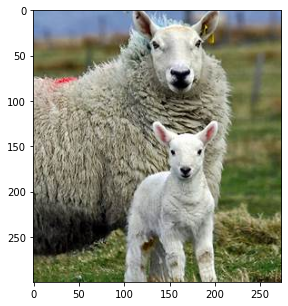

In [7]:
image_input = cv2.imread('/content/drive/MyDrive/animals10/raw-img/pecora/OIP--5EOVD9HIiHEqNd8PZjFogHaII.jpeg')

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
#Input to the YOLO network is Blob object, hence we are converting the input image into a Blob
#having parameters : (input, scale factor, size, mean)
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
#Setting network input to Blob
network.setInput(blob)

#forward propogation takes place to get the network output
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [9]:
bounding_boxes = []
probabilities = []
class_numbers = []
h,w = image_input.shape[:2]

#looping takes place over every output layer
for result in output_from_network:
  
    #looping takes place over each of the object detections
    for detection in result:

        #Extract the class_current(as a label) and probability_current(as a probability) of the current object/animal detection
        scores = detection[5:]
        class_current = np.argmax(scores)
        probability_current = scores[class_current]

        #Discarding the weak predictions according to their probabilities
        if probability_current > probability_minimum:

            # scale the coordinates of the bounding box back relatively with the size of the image because YOLO actually
            # returns the center (x, y)-coordinates of the bounding box followed by the width and height of the boxes
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))

            #updating the coordinates of bounding box, its probabilities and its class numbers
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            probabilities.append(float(probability_current))
            class_numbers.append(class_current)

print(class_numbers[-1])                  
print(labels[class_numbers[-1]])  

18
sheep


In [10]:
def ImagePath(path):
    
    bounding_boxes = []
    probabilities = []
    class_numbers = []
    
    image_input = cv2.imread(path)
    blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
    blob_to_show = blob[0,:,:,:].transpose(1,2,0)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)
    h,w = image_input.shape[:2]

    #looping takes place over every output layer
    for result in output_from_network:
  
      #looping takes place over each of the object detections
      for detection in result:

        #Extract the class_current(as a label) and probability_current(as a probability) of the current object/animal detection
        scores = detection[5:]
        class_current = np.argmax(scores)
        probability_current = scores[class_current]

        #Discarding the weak predictions according to their probabilities
        if probability_current > probability_minimum:

            # scale the coordinates of the bounding box back relatively with the size of the image because YOLO actually
            # returns the center (x, y)-coordinates of the bounding box followed by the width and height of the boxes
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))

            #updating the coordinates of bounding box, its probabilities and its class numbers
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            probabilities.append(float(probability_current))
            class_numbers.append(class_current)

    results = cv2.dnn.NMSBoxes(bounding_boxes, probabilities, probability_minimum, threshold)

    #Need to ensure that atleast one detection of animal/object exists
    if len(results) > 0:

      #Looping over the set of indices
      for i in results.flatten():

        #Get the boundaing box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        #Inserting a bounding box rectangle and label with its probabilities (upto accuracy of 3 decimal points) on the image
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 2)
        text_box_current = '{}:{:.3f}'.format(labels[int(class_numbers[i])], probabilities[i])
        
        #formatting of the text to be inserted is done
        cv2.putText(image_input, text_box_current, (x_min, y_min + 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0,0,0), 2)

        print('Bounding Box Coordinate 1 : (', x_min, ',', y_min, ')')
        print('Bounding Box Coordinate 2 : (', x_min+box_width, ',', y_min, ')')
        print('Bounding Box Coordinate 3 : (', x_min, ',', y_min+box_height, ')')
        print('Bounding Box Coordinate 4 : (', x_min+box_width, ',', y_min+box_height, ')')   
        print('\n') 

    %matplotlib inline
    plt.rcParams['figure.figsize'] = (5.0,5.0)
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    plt.show()
    
    labels2=[]
    for item in sorted(set(class_numbers)):
        labels2+=[labels[item]]
    
    return labels2
    

Bounding Box Coordinate 1 : ( 4 , 3 )
Bounding Box Coordinate 2 : ( 222 , 3 )
Bounding Box Coordinate 3 : ( 4 , 264 )
Bounding Box Coordinate 4 : ( 222 , 264 )


Bounding Box Coordinate 1 : ( 102 , 117 )
Bounding Box Coordinate 2 : ( 207 , 117 )
Bounding Box Coordinate 3 : ( 102 , 293 )
Bounding Box Coordinate 4 : ( 207 , 293 )




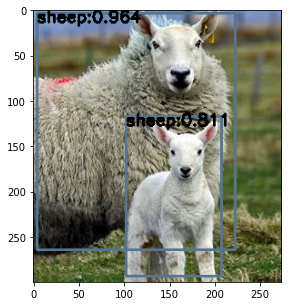

['sheep']

In [11]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/pecora/OIP--5EOVD9HIiHEqNd8PZjFogHaII.jpeg')

Bounding Box Coordinate 1 : ( 11 , 9 )
Bounding Box Coordinate 2 : ( 235 , 9 )
Bounding Box Coordinate 3 : ( 11 , 185 )
Bounding Box Coordinate 4 : ( 235 , 185 )




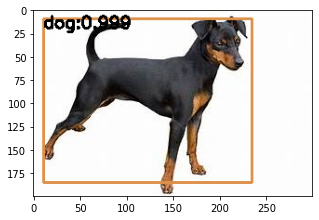

['dog']

In [12]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/cane/OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg')

Bounding Box Coordinate 1 : ( 103 , 33 )
Bounding Box Coordinate 2 : ( 244 , 33 )
Bounding Box Coordinate 3 : ( 103 , 178 )
Bounding Box Coordinate 4 : ( 244 , 178 )


Bounding Box Coordinate 1 : ( 62 , 51 )
Bounding Box Coordinate 2 : ( 111 , 51 )
Bounding Box Coordinate 3 : ( 62 , 113 )
Bounding Box Coordinate 4 : ( 111 , 113 )




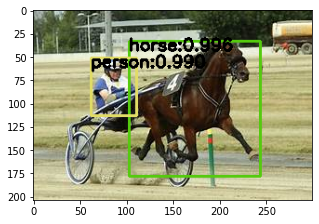

['person', 'horse']

In [13]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/cavallo/OIP---sK_NCo5VFiDavIY-pUdgHaFB.jpeg')

Bounding Box Coordinate 1 : ( 8 , 48 )
Bounding Box Coordinate 2 : ( 287 , 48 )
Bounding Box Coordinate 3 : ( 8 , 259 )
Bounding Box Coordinate 4 : ( 287 , 259 )




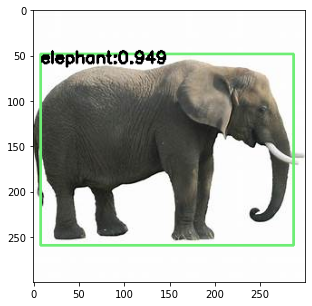

['elephant']

In [14]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/elefante/OIP--NEqn4JVnn251xGu7ss4bQHaHa.jpeg')

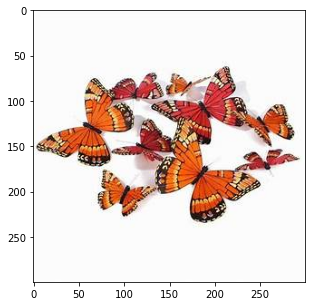

[]

In [15]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/farfalla/OIP--3xxJkezSkNzxrQaxlhv-QHaHa.jpeg')

Bounding Box Coordinate 1 : ( 83 , 29 )
Bounding Box Coordinate 2 : ( 278 , 29 )
Bounding Box Coordinate 3 : ( 83 , 169 )
Bounding Box Coordinate 4 : ( 278 , 169 )




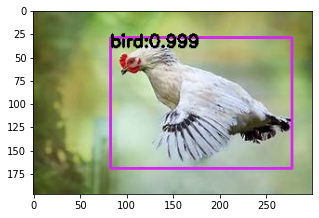

['bird']

In [16]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/gallina/1044.jpeg')

Bounding Box Coordinate 1 : ( 47 , 6 )
Bounding Box Coordinate 2 : ( 245 , 6 )
Bounding Box Coordinate 3 : ( 47 , 166 )
Bounding Box Coordinate 4 : ( 245 , 166 )




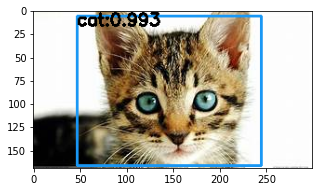

['cat']

In [17]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/gatto/1001.jpeg')

Bounding Box Coordinate 1 : ( 26 , 27 )
Bounding Box Coordinate 2 : ( 277 , 27 )
Bounding Box Coordinate 3 : ( 26 , 208 )
Bounding Box Coordinate 4 : ( 277 , 208 )




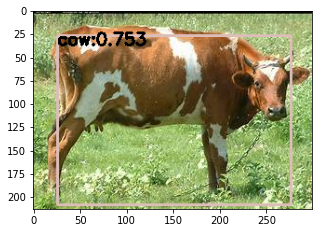

['cow']

In [18]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/mucca/OIP--DTVnqj-HKjAEvLxZyOYGQHaFP.jpeg')

Bounding Box Coordinate 1 : ( 45 , 51 )
Bounding Box Coordinate 2 : ( 198 , 51 )
Bounding Box Coordinate 3 : ( 45 , 216 )
Bounding Box Coordinate 4 : ( 198 , 216 )


Bounding Box Coordinate 1 : ( 217 , 126 )
Bounding Box Coordinate 2 : ( 249 , 126 )
Bounding Box Coordinate 3 : ( 217 , 154 )
Bounding Box Coordinate 4 : ( 249 , 154 )




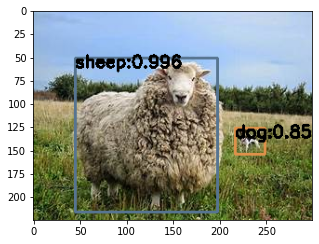

['dog', 'sheep']

In [19]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/pecora/OIP--CqWh6W1NLb76TYL4OCGAAHaFi.jpeg')

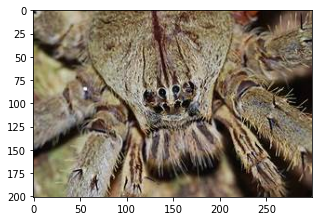

[]

In [20]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/ragno/OIP--Bma656GiSO8H3qmvkDIzwHaE9.jpeg')

Bounding Box Coordinate 1 : ( 142 , 32 )
Bounding Box Coordinate 2 : ( 216 , 32 )
Bounding Box Coordinate 3 : ( 142 , 146 )
Bounding Box Coordinate 4 : ( 216 , 146 )




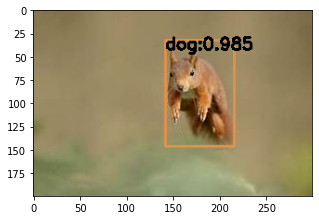

['dog']

In [21]:
ImagePath('/content/drive/MyDrive/animals10/raw-img/scoiattolo/OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg')